# <b><u>Data Wrangling and EDA


## **We can merge dataframes using the following methods**

* <code> pd.concat( [df] , axis) </code>

* <code> pd.merge( df1, df2 ,on,how,suffixes) </code>






In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Load the dataset

file_path = '/content/imdb_data.csv'
imdb_df=pd.read_csv(file_path)

In [ ]:
#Check the top 05 members in the data
import pandas as pd, ast
from collections import Counter

# Load the CSV with more robust parsing
df = pd.read_csv('imdb_data.csv', quotechar='"', on_bad_lines='skip')  # Skips malformed rows

names = []
for cast in df['cast'].dropna():
    try:
        for member in ast.literal_eval(cast):
            names.append(member.get('name'))
    except:
        continue  # Skip rows with invalid format

top_5 = Counter(names).most_common(5)
print(top_5)


[('Robert De Niro', 31), ('Samuel L. Jackson', 30), ('Morgan Freeman', 29), ('J.K. Simmons', 27), ('Susan Sarandon', 27)]


In [ ]:
#Check for the Null values(if any)
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
print(null_columns)

belongs_to_collection    2488
genres                      7
homepage                 2130
overview                    9
poster_path                 1
production_companies      163
production_countries       56
runtime                     2
spoken_languages           20
tagline                   630
Keywords                  289
cast                       13
crew                       16
revenue                     2
dtype: int64


In [ ]:
#Try removing (permanent) the "id-column" from the dataframe
df = df.drop('id', axis=1)



## Let us go ahead and create three subsets of our original dataset

In [ ]:
# Create three dataframes as per the following requirement(s):
'''
['runtime'] >= 150]
['runtime'] < 150) & ['runtime'] > 100 )]
['runtime'] <= 100]
'''
df1 = df[df['runtime'] >= 150]
df2 = df[(df['runtime'] < 150) & (df['runtime'] > 100)]
df3 = df[df['runtime'] <= 100]


In [ ]:
# imdb1.head()  <checking the first subset>

imdb1 = df[df['runtime'] >= 150]
imdb1.head()
```


,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
47,NaN,44000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://thehatefuleight.com/,tt3460252,en,The Hateful Eight,Bounty hunters seek shelter from a raging bliz...,20.328822,/fqe8JxDNO8B8QfOGTdjh6sPCdSC.jpg,...,12/25/15,167.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,No one comes up here without a damn good reason.,The Hateful Eight,"[{'id': 801, 'name': 'bounty hunter'}, {'id': ...","[{'cast_id': 22, 'character': 'Major Marquis W...","[{'credit_id': '538aa95ec3a368714e0005b3', 'de...",155760117.0
51,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,/nc6FRAVC4a8o4podiFy2P5qI9ul.jpg,...,7/1/65,160.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333.0
76,NaN,500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0242572,ta,Kandukondain Kandukondain,Two young women with differing views on love f...,0.660663,/AnhaX3iivU7aLc6fLuAuHXTsbgO.jpg,...,5/5/00,157.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kandukondain Kandukondain,NaN,"[{'cast_id': 1, 'character': 'Manohar', 'credi...","[{'credit_id': '52fe47c7c3a368484e0d8f41', 'de...",500000.0
97,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt1772980,ru,Mishen,"In the year 2020, a group of wealthy Moscovite...",1.042112,/uMzkG73Y5qL9tiRrXnGlndOqhbJ.jpg,...,6/26/11,158.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Target,NaN,"[{'cast_id': 1001, 'character': 'Victor', 'cre...","[{'credit_id': '58cdbad4c3a36850e9011085', 'de...",73000.0
139,"[{'id': 343944, 'name': 'Singam Collection', '...",2200000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt1655607,ta,Singam,"The story, set in the backdrop of Nallore, a s...",1.132835,/1QDQjw97ivyVl4isatEgLD49xq0.jpg,...,5/28/10,154.0,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}]",Released,NaN,Singam,"[{'id': 158927, 'name': 'police investigation'...","[{'cast_id': 5, 'character': 'Durai Singam', '...","[{'credit_id': '58a06b4cc3a36802f7006a52', 'de...",9700000.0


In [ ]:
# imdb2.head()    <checking the second subset>

imdb2 = df[(df['runtime'] < 150) & (df['runtime'] > 100)]
imdb2.head()



,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0
10,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",1000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148,en,Rocky,"When world heavyweight boxing champion, Apollo...",14.774066,/i5xiwdSsrecBvO7mIfAJixeEDSg.jpg,...,11/21/76,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His whole life was a million-to-one shot.,Rocky,"[{'id': 240, 'name': 'underdog'}, {'id': 276, ...","[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",117235147.0


In [ ]:
#imdb3.head()    <checking the third subset>
imdb3 = df[df['runtime'] <= 100]
imdb3.head()



,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0
5,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638.0
6,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075.0
7,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511.0
8,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391.0


In [ ]:
# Concat both axis
combined_df = pd.concat([imdb1, imdb2, imdb3], axis=0)



In [ ]:
#Check whether concatinating the 03 subsets leaves any null values?
combined_df.isnull().sum()

,0
belongs_to_collection,2486
budget,0
genres,7
homepage,2128
imdb_id,0
original_language,0
original_title,0
overview,7
popularity,0
poster_path,0


In [ ]:
#imdb_df.info()
imdb_df = combined_df
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3113 entries, 47 to 3113
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  627 non-null    object 
 1   budget                 3113 non-null   int64  
 2   genres                 3106 non-null   object 
 3   homepage               985 non-null    object 
 4   imdb_id                3113 non-null   object 
 5   original_language      3113 non-null   object 
 6   original_title         3113 non-null   object 
 7   overview               3106 non-null   object 
 8   popularity             3113 non-null   float64
 9   poster_path            3113 non-null   object 
 10  production_companies   2951 non-null   object 
 11  production_countries   3058 non-null   object 
 12  release_date           3113 non-null   object 
 13  runtime                3113 non-null   float64
 14  spoken_languages       3094 non-null   object 
 15  status  

In [ ]:
#imdb_df.shape
imdb_df.shape

(3113, 22)

In [ ]:
#imdb1.shape,imdb2.shape,imdb3.shape
imdb1.shape, imdb2.shape, imdb3.shape

((140, 22), (1641, 22), (1332, 22))

In [ ]:
# Concatenate along a particular axis

# sample_df = pd.concat([imdb1, imdb2],axis=1)   #Here, user try merge the two subsets
                                                 #one after the other via columns
sample_df = pd.concat([imdb1, imdb2], axis=1)

In [ ]:
# Check the last few columns to actually feel it

# sample_df.tail()
sample_df.tail()


,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
3109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9/18/92,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067.0
3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687.0
3111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590.0
3112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761.0
3114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155.0


In [ ]:
#sample_df.info()
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 47 to 3114
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  22 non-null     object 
 1   budget                 140 non-null    float64
 2   genres                 139 non-null    object 
 3   homepage               41 non-null     object 
 4   imdb_id                140 non-null    object 
 5   original_language      140 non-null    object 
 6   original_title         140 non-null    object 
 7   overview               140 non-null    object 
 8   popularity             140 non-null    float64
 9   poster_path            140 non-null    object 
 10  production_companies   129 non-null    object 
 11  production_countries   139 non-null    object 
 12  release_date           140 non-null    object 
 13  runtime                140 non-null    float64
 14  spoken_languages       140 non-null    object 
 15  status  

In [ ]:
#sample_df.columns   #see the columns size!!!!
sample_df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue', 'belongs_to_collection',
       'budget', 'genres', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue'],
      dtype='object')

In [ ]:
# imdb1.shape, imdb2.shape
imdb1.shape, imdb2.shape

((140, 22), (1641, 22))

# Now let's do some joins

* ### Inner join
* ### Left join
* ### Right join
* ### Outer join

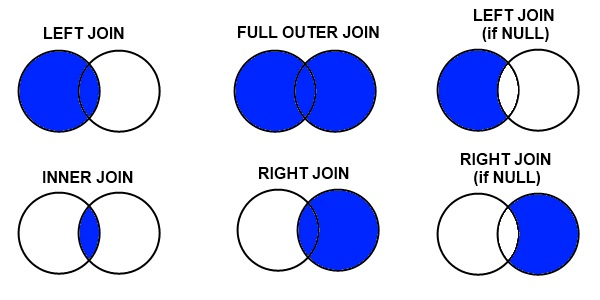

In [ ]:
# Let us create a dataframe which consists of only English movies


# Next let us create another dataframe which consists of only those movies whose
 # length is greater than 100 mins and contains the following columns only:
 #'imdb_id','original_language']


english_movies = df[df['original_language'] == 'en']

long_movies = df[df['runtime'] > 100][['imdb_id', 'original_language']]



In [ ]:
#english_movies.shape, long_movies.shape
english_movies.shape, long_movies.shape

((2671, 22), (1781, 2))

In [ ]:
#type(long_movies)
type(long_movies)

pandas.core.frame.DataFrame

In [ ]:
#long_movies.head()
long_movies.head()

,imdb_id,original_language
1,tt0368933,en
2,tt2582802,en
3,tt1821480,hi
4,tt1380152,ko
10,tt0075148,en


# <u><b> Using inner join to merge the two dataframes

In [ ]:
# Merging the two dataframes using inner join
# merged_IJ_df = pd.merge(english_movies, long_movies, how='inner',left_on='imdb_id',right_on='imdb_id')
merged_IJ_df = pd.merge(
    english_movies,
    long_movies,
    how='inner',
    left_on='imdb_id',
    right_on='imdb_id'
)

In [ ]:
# merged_IJ_df
merged_IJ_df

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language_x,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,original_language_y
0,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,en
1,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,en
2,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",1000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148,en,Rocky,"When world heavyweight boxing champion, Apollo...",14.774066,/i5xiwdSsrecBvO7mIfAJixeEDSg.jpg,...,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His whole life was a million-to-one shot.,Rocky,"[{'id': 240, 'name': 'underdog'}, {'id': 276, ...","[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",117235147.0,en
3,NaN,15000000,"[{'id': 18, 'name': 'Drama'}]",http://www.dreamworks.com/ab/,tt0169547,en,American Beauty,"Lester Burnham, a depressed suburban father in...",20.726578,/or1MP8BZIAjqWYxPdPX724ydKar.jpg,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Look closer.,American Beauty,"[{'id': 255, 'name': 'male nudity'}, {'id': 29...","[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",356296601.0,en
4,"[{'id': 91698, 'name': 'Chili Palmer Collectio...",53000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,tt0377471,en,Be Cool,"Disenchanted with the movie industry, Chili Pa...",13.314233,/ekKCH7Zkb5ZTr1f1AczZY23FH.jpg,...,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Everyone is looking for the next big hit,Be Cool,"[{'id': 3605, 'name': 'baseball bat'}, {'id': ...","[{'cast_id': 4, 'character': 'Chili Palmer', '...","[{'credit_id': '52fe43cbc3a36847f807039f', 'de...",95226116.0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,NaN,60000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.theterminal-themovie.com/,tt0362227,en,The Terminal,Viktor Navorski is a man without a country; hi...,14.092373,/f4Dup6awDfDqAHKgWqNJ2HFw1qN.jpg,...,128.0,"[{'iso_639_1': 'bg', 'name': 'български език'}...",Released,Life is waiting.,The Terminal,"[{'id': 242, 'name': 'new york'}, {'id': 822, ...","[{'cast_id': 4, 'character': 'Viktor Navorski'...","[{'credit_id': '52fe4259c3a36847f8017699', 'de...",219417255.0,en
1571,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,/poV3j71mcmQkmjezc2H35xJsAhD.jpg,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067.0,en
1572,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,...,1

In [ ]:
# temp_df = imdb_df[(imdb_df['original_language'] == 'en') & (imdb_df['runtime'] >=100)]
temp_df = imdb_df[(imdb_df['original_language'] == 'en') & (imdb_df['runtime'] >= 100)]

In [ ]:
# temp_df.shape
temp_df.shape


(1578, 22)

# <u><b> Using left join to merge the two dataframes

In [ ]:
# Merging the two dataframes using left join
# merged_LJ_df = pd.merge(english_movies, long_movies, how='left',left_on='imdb_id',right_on='imdb_id')
merged_LJ_df = pd.merge(
    english_movies,
    long_movies,
    how='left',
    left_on='imdb_id',
    right_on='imdb_id'
)

In [ ]:
# merged_LJ_df   #<check the difference while joining this way and via Inner join>
merged_LJ_df

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language_x,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,original_language_y
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0,NaN
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,en
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,en
3,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638.0,NaN
4,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,...,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,/poV3j71mcmQkmjezc2H35xJsAhD.jpg,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067.0,en
2761,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,...,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687.0,en
2762,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,...,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]

# <u><b> Using right join to merge the two dataframes

In [ ]:
# Merging the two dataframes using right join
# merged_RJ_df = pd.merge(english_movies, long_movies, how='right',left_on=['imdb_id'],right_on='imdb_id')
merged_RJ_df = pd.merge(
    english_movies,
    long_movies,
    how='right',
    left_on='imdb_id',
    right_on='imdb_id'
)

In [ ]:
# merged_RJ_df   #<check the difference while joining this way and via Inner join and left join>
merged_RJ_df

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language_x,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,original_language_y
0,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,en
1,NaN,3300000.0,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,en
2,NaN,NaN,NaN,NaN,tt1821480,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hi
3,NaN,NaN,NaN,NaN,tt1380152,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ko
4,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",1000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148,en,Rocky,"When world heavyweight boxing champion, Apollo...",14.774066,/i5xiwdSsrecBvO7mIfAJixeEDSg.jpg,...,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His whole life was a million-to-one shot.,Rocky,"[{'id': 240, 'name': 'underdog'}, {'id': 276, ...","[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",117235147.0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,/poV3j71mcmQkmjezc2H35xJsAhD.jpg,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067.0,en
1871,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,...,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687.0,en
1872,NaN,NaN,NaN,NaN,tt2364975,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sv
1873,NaN,65000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,...,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761.0,en


# <u><b> Using outer join to merge the two dataframes

In [ ]:
# Outer Join
# merged_OJ_df = pd.merge(english_movies[['imdb_id','runtime']],long_movies, on='imdb_id', how='outer')
merged_OJ_df = pd.merge(
    english_movies[['imdb_id', 'runtime']],
    long_movies,
    on='imdb_id',
    how='outer'
)

In [ ]:
# merged_OJ_df  #<check the difference while joining this way and via other joins>
merged_OJ_df

,imdb_id,runtime,original_language
0,tt0004972,193.0,en
1,tt0006333,105.0,en
2,tt0012349,68.0,NaN
3,tt0015400,149.0,en
4,tt0016104,137.0,en
...,...,...,...
3060,tt6003368,91.0,NaN
3061,tt6201292,NaN,ta
3062,tt6574272,80.0,NaN
3063,tt6673840,NaN,ru


# **Finally let us do some <code>groupby</code> operations**

In [ ]:
# Importing datetime modules
from datetime import datetime
from datetime import date

In [ ]:
def parse_string_to_date(datestring):

  return convert_to_year(datestring)

In [ ]:
# Applying lambda function to convert release date into date-time format of a given choice
import pandas as pd
from datetime import datetime, date

# Ensure release_date is converted to datetime safely
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%m/%d/%y')

In [ ]:
def convert_to_year(datevalue):
  return datevalue.year

In [ ]:
# imdb_df['new_release_date_2'].head()
imdb_df['new_release_date_2'] = pd.to_datetime(imdb_df['release_date'], errors='coerce', format='%m/%d/%y')
imdb_df['new_release_date_2'].head()

,new_release_date_2
47,2015-12-25
51,2065-07-01
76,2000-05-05
97,2011-06-26
139,2010-05-28


In [ ]:
# Extract the Year of Relase from the associated dataframe
# such that it should be added as a last column

imdb_df['Year_of_release_1'] = imdb_df['new_release_date_2'].dt.year

In [ ]:
# Searching the year in the 3rd Row:

# imdb_df['new_release_date_2'][2].year
imdb_df['new_release_date_2'].iloc[2].year

2000

In [ ]:
# imdb_df.head()
imdb_df.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,new_release_date_2,Year_of_release_1
47,NaN,44000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://thehatefuleight.com/,tt3460252,en,The Hateful Eight,Bounty hunters seek shelter from a raging bliz...,20.328822,/fqe8JxDNO8B8QfOGTdjh6sPCdSC.jpg,...,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,No one comes up here without a damn good reason.,The Hateful Eight,"[{'id': 801, 'name': 'bounty hunter'}, {'id': ...","[{'cast_id': 22, 'character': 'Major Marquis W...","[{'credit_id': '538aa95ec3a368714e0005b3', 'de...",155760117.0,2015-12-25,2015
51,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,/nc6FRAVC4a8o4podiFy2P5qI9ul.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333.0,2065-07-01,2065
76,NaN,500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0242572,ta,Kandukondain Kandukondain,Two young women with differing views on love f...,0.660663,/AnhaX3iivU7aLc6fLuAuHXTsbgO.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kandukondain Kandukondain,NaN,"[{'cast_id': 1, 'character': 'Manohar', 'credi...","[{'credit_id': '52fe47c7c3a368484e0d8f41', 'de...",500000.0,2000-05-05,2000
97,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt1772980,ru,Mishen,"In the year 2020, a group of wealthy Moscovite...",1.042112,/uMzkG73Y5qL9tiRrXnGlndOqhbJ.jpg,...,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Target,NaN,"[{'cast_id': 1001, 'character': 'Victor', 'cre...","[{'credit_id': '58cdbad4c3a36850e9011085', 'de...",73000.0,2011-06-26,2011
139,"[{'id': 343944, 'name': 'Singam Collection', '...",2200000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt1655607,ta,Singam,"The story, set in the backdrop of Nallore, a s...",1.132835,/1QDQjw97ivyVl4isatEgLD49xq0.jpg,...,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}]",Released,NaN,Singam,"[{'id': 158927, 'name': 'police investigation'...","[{'cast_id': 5, 'character': 'Durai Singam', '...","[{'credit_id': '58a06b4cc3a36802f7006a52', 'de...",9700000.0,2010-05-28,2010


In [ ]:
# Make your Year of Release 100 Years passed if the Year is found greater than 2020

# imdb_df['Year_of_release'] = np.where(imdb_df['Year_of_release_1'] > 2020,imdb_df['Year_of_release_1'] - 100,imdb_df['Year_of_release_1'])

# Please try to get the same output using other form of conditional statements
imdb_df['Year_of_release'] = imdb_df['Year_of_release_1'].apply(
    lambda x: x - 100 if x > 2020 else x
)

In [ ]:
# imdb_df['Year_of_release'].unique()
imdb_df['Year_of_release'].unique()

array([2015, 1965, 2000, 2011, 2010, 1999, 1991, 2002, 1966, 2001, 1968,
       1997, 1998, 2006, 1956, 2005, 2008, 2004, 2012, 1960, 2016, 1961,
       1982, 1959, 2009, 2013, 1951, 1990, 2007, 1985, 1992, 1987, 1972,
       1962, 1977, 2017, 1984, 1980, 1967, 1983, 1994, 1957, 1964, 1988,
       2003, 1963, 1978, 1995, 1973, 2014, 1996, 1986, 1979, 1976, 1981,
       1993, 1949, 1970, 1971, 1989, 1975, 1940, 1969, 1954, 1953, 1952,
       1944, 1955, 1936, 1935, 1942, 1932, 1939, 1950, 1945, 1948, 1974,
       1925, 1938, 1947, 1924, 1928, 1933, 1958, 1931, 1927, 1943, 1921,
       1930, 1926])

In [ ]:
# imdb_df['Year_of_release'].min()
imdb_df['Year_of_release'].min()

1921

In [ ]:
# find the maximum movie runtime across different years
max_runtime_movies_by_year = imdb_df.groupby('Year_of_release')['runtime'].max()

In [ ]:
# Rename the column "runtime" by "max_runtime"

# max_runtime_movies_by_year.rename(columns = {'runtime' : 'max_runtime'},inplace=True)
max_runtime_movies_by_year = max_runtime_movies_by_year.reset_index().rename(columns={'runtime': 'max_runtime'})

In [ ]:
# imdb_df.shape
imdb_df.shape

(3113, 25)

In [ ]:
# max_runtime_movies_by_year.head()
max_runtime_movies_by_year.head()

,Year_of_release,max_runtime
0,1921,68.0
1,1924,149.0
2,1925,137.0
3,1926,84.0
4,1927,94.0


In [ ]:
# Find the Total number of Movies released every Year
movies_per_year = imdb_df.groupby('Year_of_release').size()

In [ ]:
# Find the Total number of English Movies released every Year
english_movies_per_year = imdb_df[imdb_df['original_language'] == 'en'].groupby('Year_of_release').size()
english_movies_per_year = english_movies_per_year.reset_index(name='total_english_movies')

In [ ]:
#  find the most popular movie runtime across different years
popular_runtime_by_year = imdb_df.groupby('Year_of_release')['runtime'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

In [ ]:
# imdb_df.groupby('Year_of_release')['imdb_id'].count().median()
imdb_df.groupby('Year_of_release')['imdb_id'].count().median()

8.0

In [ ]:
# Total Runtime for movies every year

# imdb_df.groupby('Year_of_release', as_index=False).agg({"runtime": "sum"})
total_runtime_per_year = imdb_df.groupby('Year_of_release', as_index=False).agg({"runtime": "sum"})
total_runtime_per_year.rename(columns={'runtime': 'total_runtime'}, inplace=True)

print(total_runtime_per_year.head())

   Year_of_release  total_runtime
0             1921           68.0
1             1924          149.0
2             1925          212.0
3             1926           84.0
4             1927          174.0


In [ ]:
# Grouping the existing 'df' w.r.t. 'Year_of_release', 'original_language'
grouped_df = imdb_df.groupby(['Year_of_release', 'original_language'], as_index=False).agg({
    'runtime': 'sum',       # example aggregation
    'imdb_id': 'count'     # count of movies
})

grouped_df.rename(columns={'runtime': 'total_runtime', 'imdb_id': 'movie_count'}, inplace=True)

print(grouped_df.head())

   Year_of_release original_language  total_runtime  movie_count
0             1921                en           68.0            1
1             1924                en          149.0            1
2             1925                en          137.0            1
3             1925                ru           75.0            1
4             1926                en           84.0            1


In [ ]:
# Use the aforementioned grouped data owing to find the Average Runtime, Total Revenue,
# and total number of movies associated w.r.t. the [Year of Release and Original Language]
# Convert 'release_date' to datetime if needed, then extract year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['Year_of_release'] = df['release_date'].dt.year

# Group by Year_of_release and original_language
grouped_stats = df.groupby(['Year_of_release', 'original_language'], as_index=False).agg({
    'runtime': 'mean',     # Average Runtime
    'revenue': 'sum',      # Total Revenue
    'imdb_id': 'count'     # Total Number of Movies
})

# Rename columns for clarity
grouped_stats.rename(columns={
    'runtime': 'avg_runtime',
    'revenue': 'total_revenue',
    'imdb_id': 'movie_count'
}, inplace=True)

print(grouped_stats.head())

   Year_of_release original_language  avg_runtime  total_revenue  movie_count
0             1969                en   137.000000    161516988.0            4
1             1969                fr   145.000000       741766.0            1
2             1970                en   115.750000    267840869.0            8
3             1970                fr   126.000000            3.0            1
4             1971                en   109.111111    392741951.0            9


In [ ]:
# Group the data frame by month and item and extract a number of stats from each group
print(df.columns)
df['release_date'] = pd.to_datetime(df['release_date'])  # convert if needed
df['month'] = df['release_date'].dt.month

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
